# Week 5: Regression and Exploratory data analysis

# Rasika Bhalerao

# Agenda

- [Week 5 async Qs](https://docs.google.com/presentation/d/1fav1xerpiMa8JO15hYkfHXymDcvog6FHmxa5bwsS_78/edit?usp=sharing)
- Explore Boston housing dataset
- Linear regression to predict price
- Logistic regression and ROC curves
- [Social bias in logistic regression](https://support.perspectiveapi.com/s/about-the-api-best-practices-risks)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston, fetch_openml
import pandas
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

In [ ]:
# load the Boston housing data
boston = load_boston()
X, Y = boston.data, boston.target

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Split into train and test.
train_data, train_labels = X[:350], Y[:350]
test_data, test_labels = X[350:], Y[350:]

In [ ]:
print (len(train_data), len(test_data))

350 156


In [ ]:
df_boston = pandas.DataFrame(X, columns=boston.feature_names)
df_boston['PRICE'] =  boston.target
df_target = pandas.DataFrame(boston.target)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,24.0
1,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,21.6
2,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,34.7
3,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,33.4
4,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,22.4
502,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87,20.6
503,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30,23.9
504,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80,22.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6db9982390>,
      dtype=object)

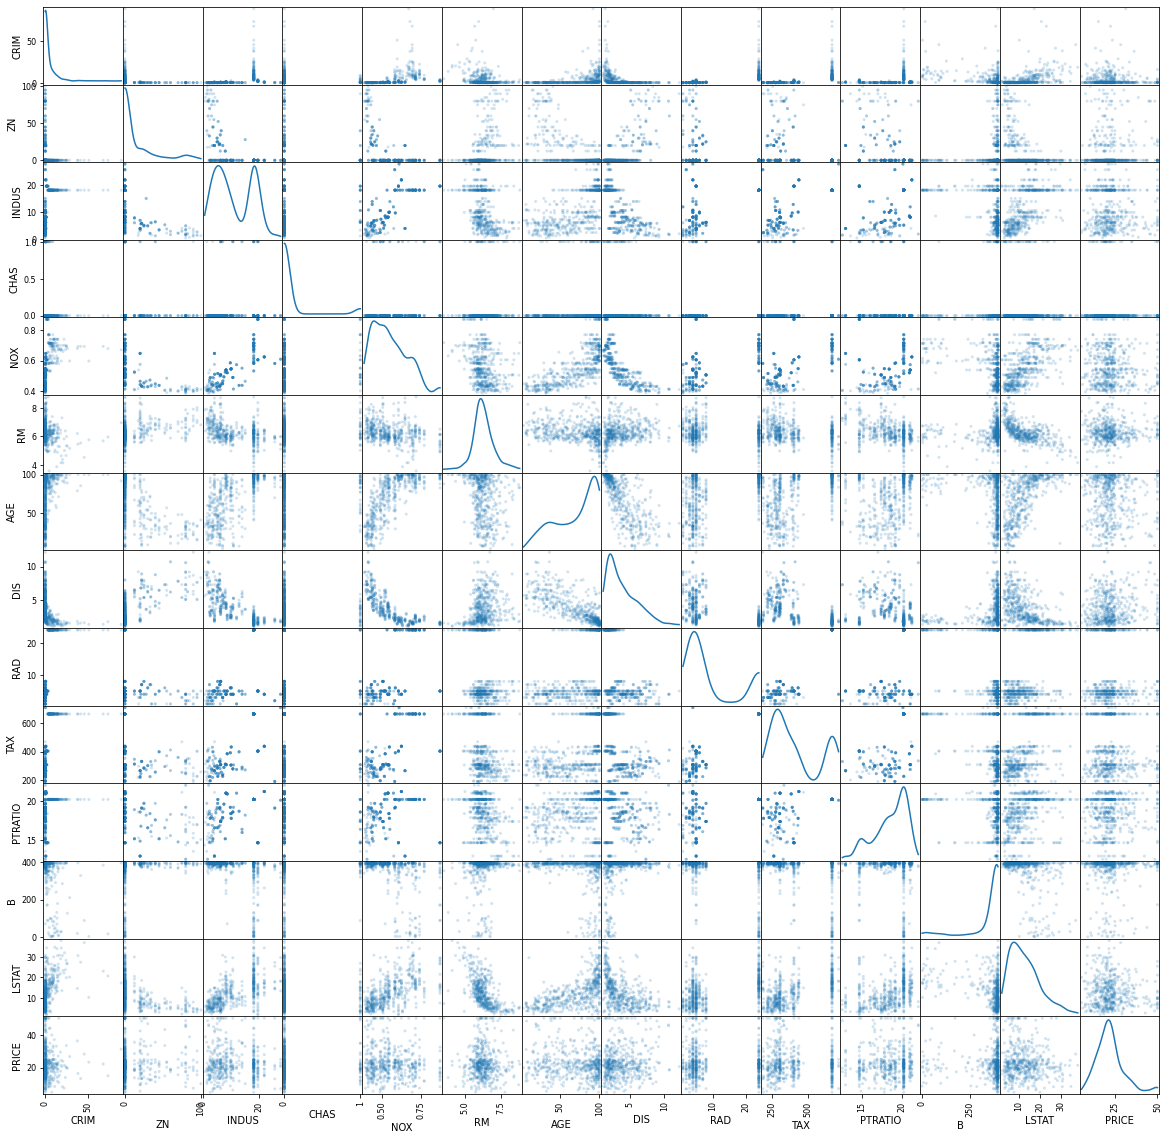

In [ ]:
scatter_matrix(df_boston, alpha=0.2, figsize=(20, 20), diagonal='kde')
# kde makes it do a kernel density estimation of the feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6db4318290>]],
      dtype=object)

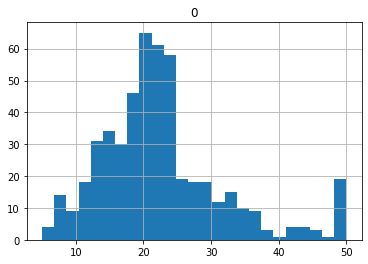

In [ ]:
# check out just the home prices
df_target.hist(bins=25)

In [ ]:
# regression
lr_model = LinearRegression()
lr_model.fit(train_data, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr_model.intercept_, lr_model.coef_

(34.35267294573378,
 array([-1.02107329e-01,  3.99278742e-02,  1.74870910e-02,  1.08772261e+00,
        -1.71636319e+01,  3.93137958e+00,  9.14939831e-04, -1.34374341e+00,
         3.85266874e-01, -1.65249144e-02, -8.86321812e-01,  9.74793769e-03,
        -4.99076593e-01]))

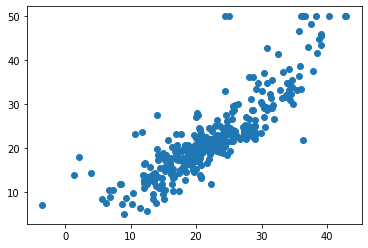

In [ ]:
# how good is the regression?
predicted_train_values = lr_model.predict(train_data)
plt.scatter(predicted_train_values, train_labels)

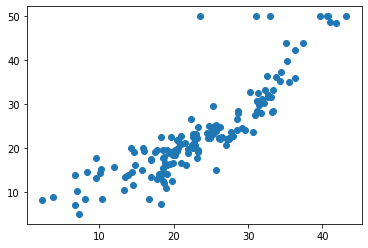

In [ ]:
predicted_test_values = lr_model.predict(test_data)
plt.scatter(predicted_test_values, test_labels)

In [ ]:
?lr_model.score

In [ ]:
lr_model.score(test_data, test_labels)

0.7518083416402184

In [ ]:
# Exercise: this data is from a time period where "above $50000" was so unimaginably
# big that here, they just labeled it as $50000. How does this affect the regression?
# What can we do about it?

### Logistic regression

In [ ]:
# Load the digits dataset from https://www.openml.org/d/554
# use only 4s and 9s
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)
X, Y = X[:1000], Y[:1000]
X = X / 255.0
indices = [i == '4' or i == '9' for i in Y]
features = X[indices]
targets = Y[indices]

# regression
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.25)
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

lr_model.score(x_test, y_test)

0.9423076923076923

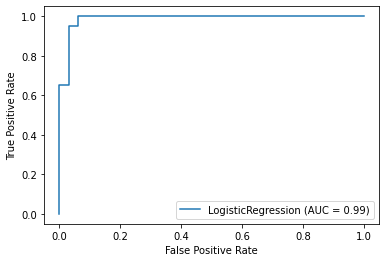

In [ ]:
# The default threshold for classification is 0.5
# What if false positives are much worse than false negatives (or vice versa)?

plot_roc_curve(lr_model, x_test, y_test)